# Daily Minimum Temperature in Me - Time Series Forecasting

***
_**Importing the required libraries & packages**_

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import tsa
from statsmodels.tsa import stattools
from scipy.stats import zscore
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from scipy.stats import boxcox
from statsmodels.api import tsa
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats
import os
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
#from pmdarima import auto_arima
import pickle
import warnings
warnings.filterwarnings('ignore')

**Read Dataset**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/talitharhmd/ADW/main/daily-minimum-temperatures-in-me.csv')
df.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


## Exploratory Data Analysis(EDA)

**Checking the data info of the column in the dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        3650 non-null   object
 1   Daily minimum temperatures  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


**Checking the data type of the column in the dataset**

In [4]:
df.dtypes

Date                          object
Daily minimum temperatures    object
dtype: object

**Ubah Tipe Data Dataset**

In [5]:
# Ubah kolom Date menjadi tipedata Datetime
df['Date'] = pd.to_datetime(df['Date'])

# Replace non-numeric values with NaN
df['Daily minimum temperatures'] = pd.to_numeric(df['Daily minimum temperatures'], errors='coerce')

# Fill NaN values with the median of the column
median_value = df['Daily minimum temperatures'].median()
df['Daily minimum temperatures'] = df['Daily minimum temperatures'].fillna(median_value)

# Convert to integer after cleaning
df['Daily minimum temperatures'] = df['Daily minimum temperatures'].astype(float)

In [6]:
df_filter = df[df['Date'].dt.year == 1990].reset_index(drop=True)
df_filter

,Date,Daily minimum temperatures
0,1990-01-01,14.8
1,1990-01-02,13.3
2,1990-01-03,15.6
3,1990-01-04,14.5
4,1990-01-05,14.3
...,...,...
360,1990-12-27,14.0
361,1990-12-28,13.6
362,1990-12-29,13.5
363,1990-12-30,15.7


In [7]:

df_filter.set_index('Date', inplace=True)
df_filter

,Daily minimum temperatures
Date,
1990-01-01,14.8
1990-01-02,13.3
1990-01-03,15.6
1990-01-04,14.5
1990-01-05,14.3
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


**Melihat Shape Dataset**

In [8]:
df_filter.shape

(365, 1)

**Cek nilai NaN pada Dataset**

In [9]:
df_filter.isna().sum()

Daily minimum temperatures    0
dtype: int64

**Getting the summary of various descriptive statistics for the numeric column in the dataset**

In [10]:
df_filter.describe()

,Daily minimum temperatures
count,365.000000
mean,11.669589
std,3.861600
min,2.100000
25%,8.700000
50%,11.400000
75%,14.600000
max,22.100000


## Data Visualization

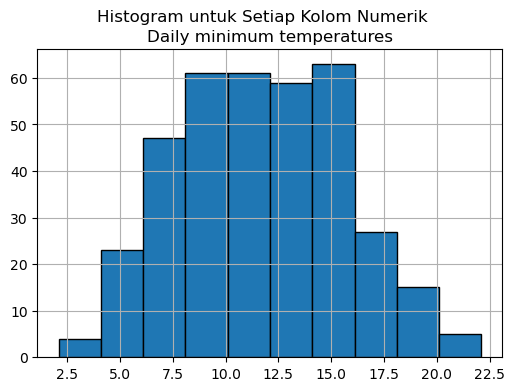

In [13]:
df_filter.hist(bins=10, figsize=(6, 4), edgecolor='black')
plt.suptitle('Histogram untuk Setiap Kolom Numerik')
plt.show()

**Plotting the line graph to show the data trend in the dataset**

In [14]:
# monthly_sum = df.resample('M').sum()
# df = monthly_sum.copy()
# df.head()

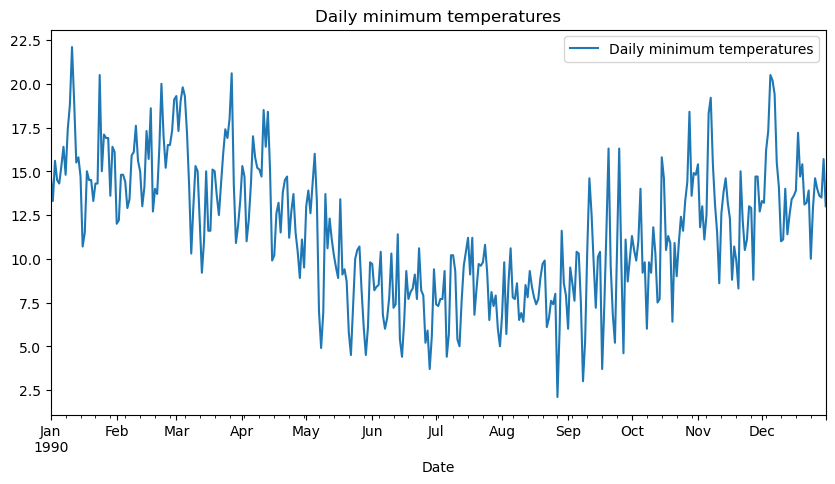

In [15]:
df_filter.plot(figsize =(10, 5))
plt.title('Daily minimum temperatures')
#plt.savefig('Monthly Milk Production.png')
plt.show()

**Plotting the histogram and KDE line graph to show the distribution of data in the dataset and saving the graph as PNG file**

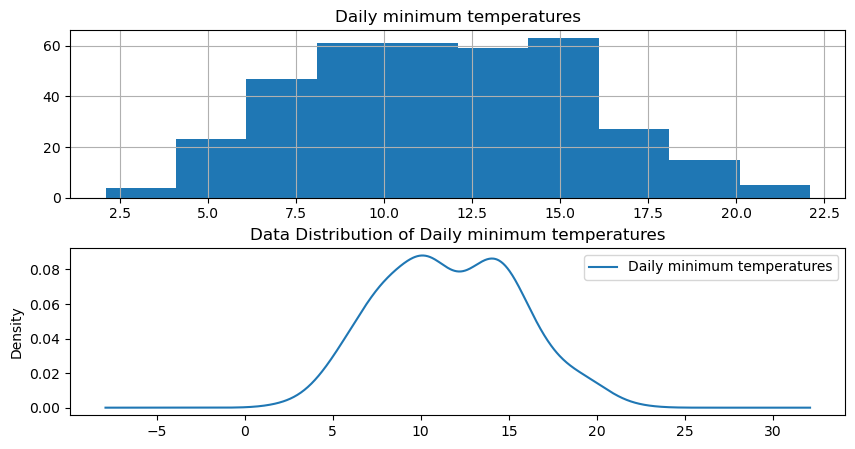

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = False, sharey = False, figsize = (10, 5))
df_filter.hist(ax = ax1)
df_filter.plot(kind = 'kde', ax = ax2 )
plt.title('Data Distribution of Daily minimum temperatures')
#plt.savefig('Data Distribution of Milk Production.png')
plt.show()

_**Plotting the graph with "Seasonal Decompose" function to show the Data Description, Trend, Seasonal, Residuals and saving the graph as PNG file**_

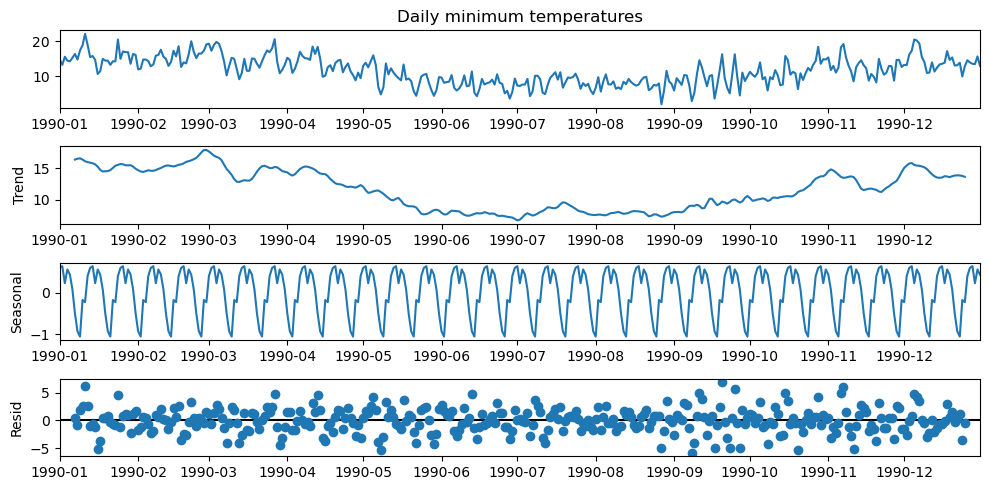

In [17]:
plt.rcParams['figure.figsize'] = 10, 5
decomposition = seasonal_decompose(df_filter['Daily minimum temperatures'], period = 12, model = 'additive') 
decomposition.plot()
#plt.savefig('Trend, Seasonal, Residual Graph.png')
plt.show()

_**Plotting the graphs with Auto-Correlation and Partial Auto-Correlation of the data from the dataset and saving the graphs as PNG file**_

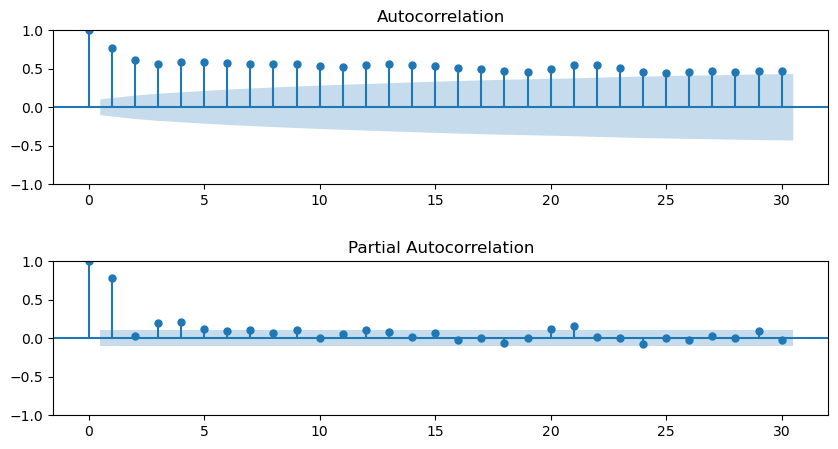

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = False, sharey = False, figsize = (10, 5))
ax1 = plot_acf(df_filter['Daily minimum temperatures'], lags = 30, ax = ax1)
ax2 = plot_pacf(df_filter['Daily minimum temperatures'], lags = 30, ax = ax2)
plt.subplots_adjust(hspace = 0.5)
#plt.savefig('ACF & PACF.png')
plt.show()

## Data Transformation

Uji Box-Cox

0.7824397531175417


<AxesSubplot:xlabel='Daily minimum temperatures', ylabel='Count'>

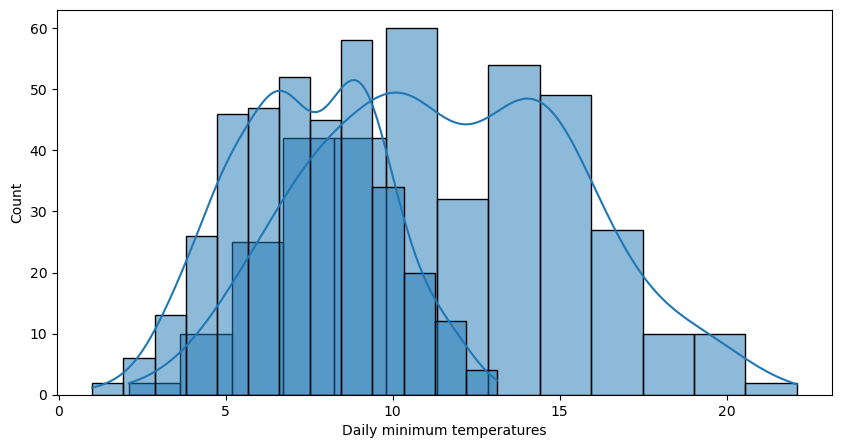

In [19]:
from scipy.stats import boxcox 

#plot the distribution of data values
sns.histplot(df_filter['Daily minimum temperatures'], kde=True) 

#perform Box-Cox transformation on original data
transformed_data, best_lambda = boxcox(df_filter['Daily minimum temperatures']) 
print(best_lambda)

#plot the distribution of the transformed data values
sns.histplot(transformed_data, kde=True) 

Lambda dari Box-Cox: 0.7824397531175417


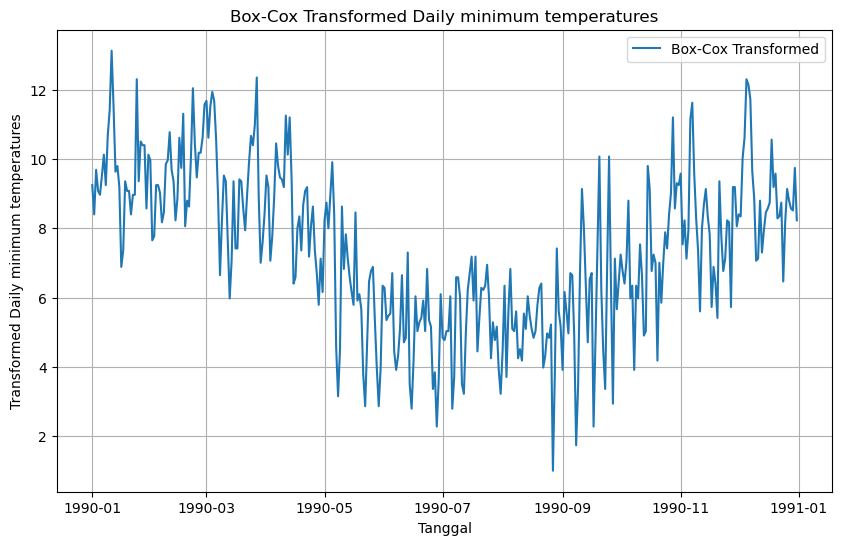

In [20]:
# Uji Box-Cox
daily_nonzero = df_filter['Daily minimum temperatures'][df_filter['Daily minimum temperatures'] > 0]  # Hapus nilai nol (syarat Box-Cox)
boxcox_transformed, lambda_value = boxcox(daily_nonzero)
print(f'Lambda dari Box-Cox: {lambda_value}')

plt.figure(figsize=(10, 6))
plt.plot(daily_nonzero.index, boxcox_transformed, label='Box-Cox Transformed')
plt.title('Box-Cox Transformed Daily minimum temperatures')
plt.xlabel('Tanggal')
plt.ylabel('Transformed Daily minimum temperatures')
plt.legend()
plt.grid()
plt.show()



Pemeriksaan kestasioneran terhadap Variansi menggunakan Box-Cox:
Nilai λ (Lambda): 0.7824397531175417
Variansi Sebelum Transformasi: 14.871102570838817
Variansi Setelah Transformasi: 5.207735788525517

Menguji kestasioneran terhadap variansi dengan visualisasi:


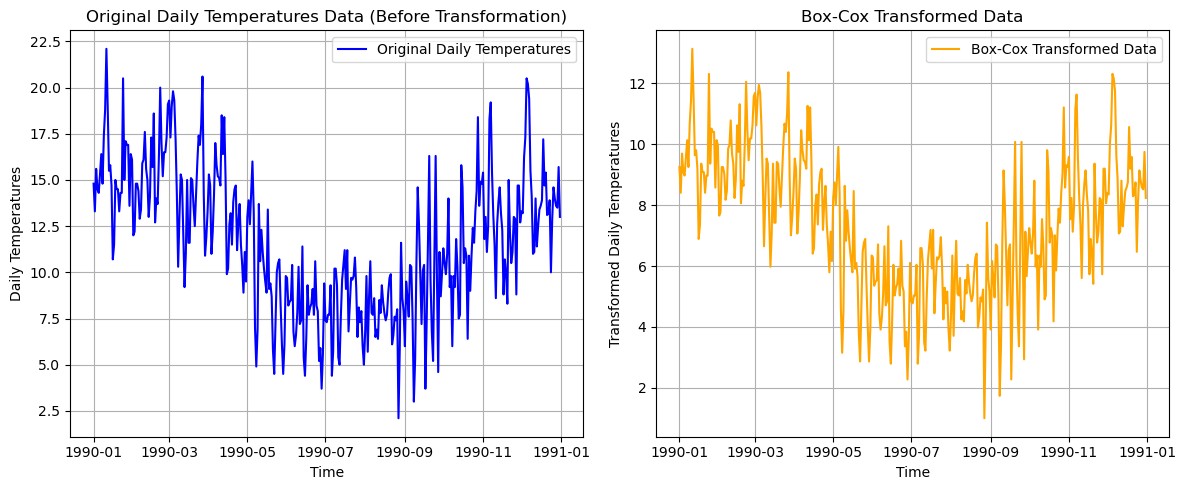

Transformasi Box-Cox berhasil menstabilkan variansi.


In [21]:
# b. Periksa kestasioneran data terhadap Variansi menggunakan Box-Cox
print("\nPemeriksaan kestasioneran terhadap Variansi menggunakan Box-Cox:")

try:
    daily_cleaned = df_filter['Daily minimum temperatures'][df_filter['Daily minimum temperatures'] > 0].dropna()
    transformed_data, lambda_value = boxcox(daily_cleaned)
    print(f"Nilai λ (Lambda): {lambda_value}")

    variance_before = np.var(daily_cleaned)
    print(f"Variansi Sebelum Transformasi: {variance_before}")

    variance_after = np.var(transformed_data)
    print(f"Variansi Setelah Transformasi: {variance_after}")

    print("\nMenguji kestasioneran terhadap variansi dengan visualisasi:")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(daily_cleaned.index, daily_cleaned, label='Original Daily Temperatures', color='blue')
    ax1.set_title('Original Daily Temperatures Data (Before Transformation)')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Daily Temperatures')
    ax1.legend()
    ax1.grid()

    ax2.plot(daily_cleaned.index, transformed_data, label='Box-Cox Transformed Data', color='orange')
    ax2.set_title('Box-Cox Transformed Data')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Transformed Daily Temperatures')
    ax2.legend()
    ax2.grid()

    plt.tight_layout()
    plt.show()

    if variance_after < variance_before:
        print("Transformasi Box-Cox berhasil menstabilkan variansi.")
    else:
        print("Transformasi Box-Cox tidak berhasil menstabilkan variansi.")

except ValueError as e:
    print(f"Error: {e}. Pastikan data tidak memiliki nilai nol atau negatif.")


**Uji ADF**

Code Bu Rini

In [22]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Uji Augmented Dickey Fuller:')
    labels = ['Statistik Uji ADF', 'P Value', 'Jumlah Lags yang Digunakan', 'Jumlah Observasi']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print('Bukti kuat terhadap hipotesis nol, maka TOLAK hipotesis nol dan seri data adalah Stasioner')
    else:
        print('Bukti lemah terhadap hipotesis nol, maka TERIMA hipotesis nol dan seri data TIDAK Stasioner')


In [23]:
adf_check(df_filter['Daily minimum temperatures'])
from statsmodels.tsa.stattools import adfuller

#perform augmented Dickey-Fuller test
adfuller(df_filter['Daily minimum temperatures'])

Uji Augmented Dickey Fuller:
Statistik Uji ADF : -1.9247551059729453
P Value : 0.320506624873654
Jumlah Lags yang Digunakan : 12
Jumlah Observasi : 352
Bukti lemah terhadap hipotesis nol, maka TERIMA hipotesis nol dan seri data TIDAK Stasioner


(-1.9247551059729453,
 0.320506624873654,
 12,
 352,
 {'1%': -3.4490648539347544,
  '5%': -2.8697861692116478,
  '10%': -2.5711631253228306},
 1571.6307697332822)

**DIFFERENCING**

In [24]:
df1 = df_filter.diff().diff(12).dropna()
adf_check(df1['Daily minimum temperatures'])

Uji Augmented Dickey Fuller:
Statistik Uji ADF : -8.545096650046784
P Value : 9.550533947741918e-14
Jumlah Lags yang Digunakan : 14
Jumlah Observasi : 337
Bukti kuat terhadap hipotesis nol, maka TOLAK hipotesis nol dan seri data adalah Stasioner


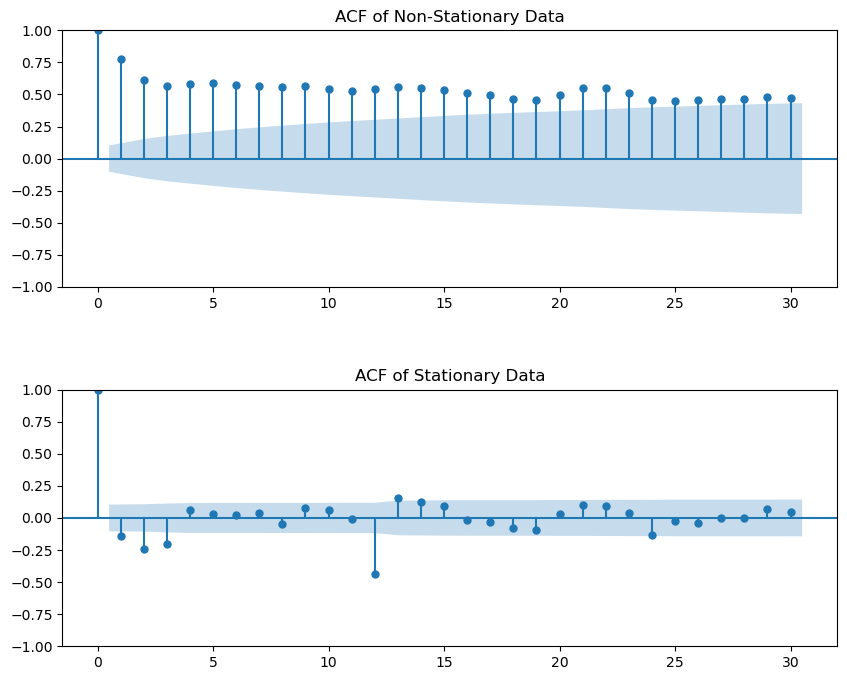

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Non-Stasioner Data (sebelum differencing)
plot_acf(df_filter['Daily minimum temperatures'], ax=ax1, lags=30)
ax1.set_title('ACF of Non-Stationary Data')

# Stasioner Data (setelah differencing)
plot_acf(df1['Daily minimum temperatures'], ax=ax2, lags=30)
ax2.set_title('ACF of Stationary Data')

plt.subplots_adjust(hspace=0.4)
plt.savefig('Autocorrelation_plot_of_Stationary_and_Non_Stationary.png')
plt.show()


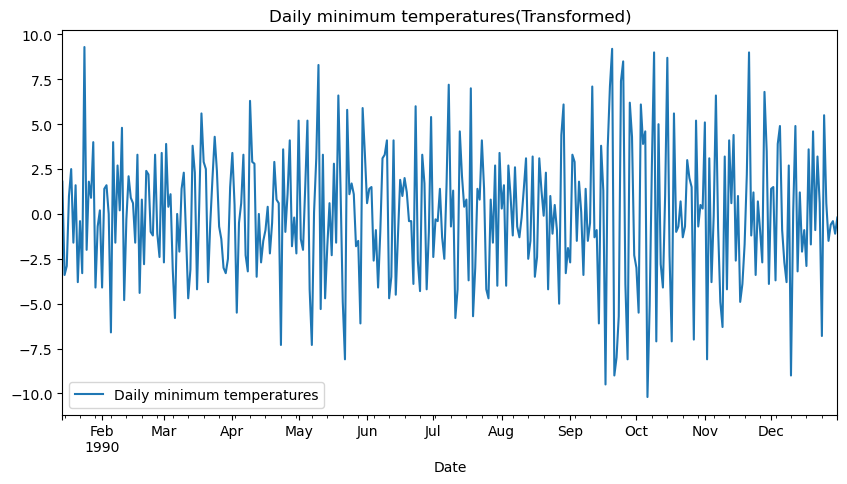

In [26]:
df1.plot(figsize =(10, 5))
plt.title('Daily minimum temperatures(Transformed)')
#plt.savefig('Monthly Milk Production(Transformed).png')
plt.show()

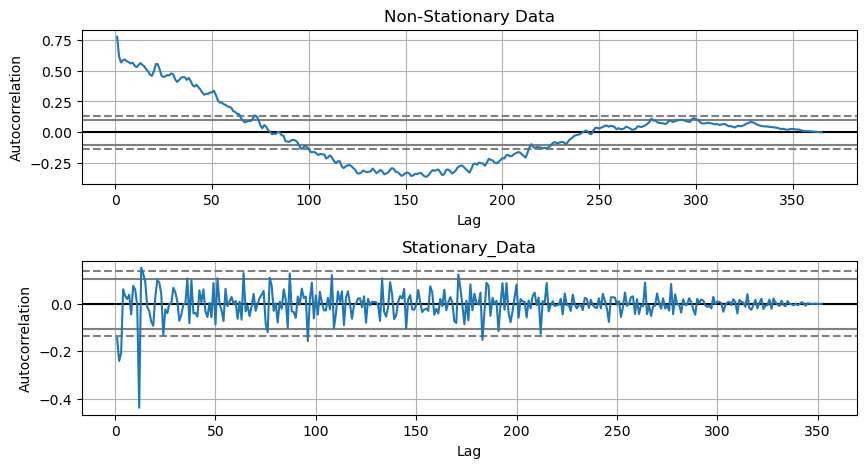

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = False, sharey = False, figsize = (10,5))
ax1 = autocorrelation_plot(df_filter['Daily minimum temperatures'], ax = ax1)
ax1.set_title('Non-Stationary Data')
ax2 = autocorrelation_plot(df1['Daily minimum temperatures'], ax = ax2)
ax2.set_title('Stationary_Data')
plt.subplots_adjust(hspace = 0.5)
#plt.savefig('Autocorrelation_plot of Stationary & Non-Stationary.png')
plt.show()

## Model Fitting

_**Getting the p value and q value for the model fitting using `auto_arima` function by passing through some needed parameters, the best model is evaluated by least Akaike Information Criterion[AIC]**_ 

In [28]:
from pmdarima import auto_arima
model = auto_arima(df_filter['Daily minimum temperatures'], d = 1, D = 1, seasonal = True, m = 12, max_order = 6,
                     start_p = 0, start_q = 0, test = 'adf', trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1917.351, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1837.886, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.05 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1911.937, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1777.859, Time=0.75 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.04 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.95 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1781.357, Time=0.34 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1742.888, Time=0.74 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=1810.582, Time=0.36 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=1673.808, Time=2.47 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.76 sec
 ARIMA(2,1,0)(2,1,2)[12]             : AIC=inf, Time=4.97 sec
 ARIMA(2,1,0)(1,1,2)[12]             : AIC=inf, T

_**Defining the summary of the model fitted with `auto_arima` function, here getting various information such as Akaike Information Criterion[AIC], Bayesian Information Criterion[BIC}, Hannan-Quinn Information Criterion[HQIC], Log Likelihood etc. from which we can evaluate the model**_

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  365
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -801.873
Date:                            Fri, 20 Dec 2024   AIC                           1617.746
Time:                                    15:44:45   BIC                           1644.792
Sample:                                01-01-1990   HQIC                          1628.509
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4920      0.059      8.379      0.000       0.377       0.607
ar.L2         -0.2078      0.058     -3.589      0.000      -0.321      -0.094
ma.L1         -0.8809      0.036    -24.176      0.000      -0.952      -0.809
ar.S.L12      -0.0912      0.068     -1.333      0.182      -0.225       0.043
ar.S.L24      -0.1527      0.064     -2.383      0.017      -0.278      -0.027
ma.S.L12      -0.8671      0.042    -20.421      0.000      -0.950      -0.784
sigma2         5.2187      0.419     12.459      0.000       4.398       6.040
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.16
Prob(Q):                              0.98   Prob(JB):                         0.92
Heteroskedasticity (H):               1.33   Skew:                             0.02
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

_**Splitting the dataset in training data(85%) and test data(15%)**_

In [30]:
train = df_filter[:int(0.85*len(df_filter))]
test = df_filter[int(0.85*len(df_filter)):]

_**Getting the shapes of training data and test data, so that we can able to know the exact observations in training and test data**_

In [31]:
train.shape, test.shape

((310, 1), (55, 1))

_**Fitting the model in SARIMAX model with the best value got from auto_arima model in the training data and getting the summary of the fitted model**_

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['Daily minimum temperatures'], order = (2,1,1), seasonal_order = (2,1,1,12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:         Daily minimum temperatures   No. Observations:                  310
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -677.896
Date:                            Fri, 20 Dec 2024   AIC                           1369.791
Time:                                    15:44:54   BIC                           1395.648
Sample:                                01-01-1990   HQIC                          1380.143
                                     - 11-06-1990                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4553      0.064      7.060      0.000       0.329       0.582
ar.L2         -0.2515      0.065     -3.852      0.000      -0.379      -0.124
ma.L1         -0.8614      0.045    -19.015      0.000      -0.950      -0.773
ar.S.L12      -0.1042      0.081     -1.290      0.197      -0.262       0.054
ar.S.L24      -0.1807      0.076     -2.381      0.017      -0.329      -0.032
ma.S.L12      -0.8218      0.061    -13.547      0.000      -0.941      -0.703
sigma2         5.2503      0.471     11.140      0.000       4.327       6.174
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.90   Prob(JB):                         0.98
Heteroskedasticity (H):               1.24   Skew:                            -0.00
Prob(H) (two-sided):                  0.29   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

_**Plotting the Diagnostic plot for the fitted model to show the best fit of the model and saving it as PNG file**_

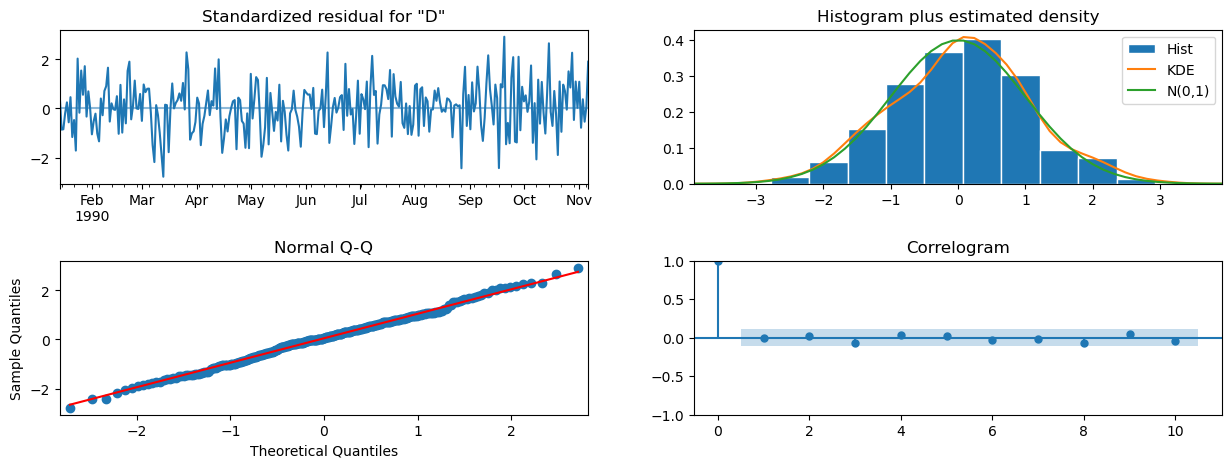

In [33]:
result.plot_diagnostics(figsize = (15,5))
plt.subplots_adjust(hspace = 0.5)
#plt.savefig('Diagnostic Plot of Best Model')
plt.show()

_**Predicting the values using test data and renaming it as "Predictions"**_

In [34]:
predictions = result.predict(len(train), len(train) + len(test) - 1, typ = 'levels').rename('Predictions')

_**Comparing the predicted value with actual value in the test data**_

In [35]:
for i in range(len(predictions)):
    print(f"predicted = {predictions[i]:<6.5}, expected = {test['Daily minimum temperatures'][i]}")

predicted = 15.81 , expected = 19.2
predicted = 13.631, expected = 15.4
predicted = 14.473, expected = 13.1
predicted = 14.828, expected = 11.5
predicted = 14.729, expected = 8.6
predicted = 15.401, expected = 12.6
predicted = 13.957, expected = 13.8
predicted = 13.415, expected = 14.6
predicted = 14.025, expected = 13.2
predicted = 13.454, expected = 12.3
predicted = 13.794, expected = 8.8
predicted = 14.637, expected = 10.7
predicted = 13.761, expected = 9.9
predicted = 14.83 , expected = 8.3
predicted = 15.445, expected = 15.0
predicted = 15.151, expected = 12.2
predicted = 14.903, expected = 10.5
predicted = 15.407, expected = 11.1
predicted = 13.29 , expected = 13.0
predicted = 13.918, expected = 12.9
predicted = 14.032, expected = 8.8
predicted = 14.004, expected = 14.7
predicted = 14.47 , expected = 14.7
predicted = 14.636, expected = 12.7
predicted = 14.349, expected = 13.3
predicted = 15.673, expected = 13.2
predicted = 16.882, expected = 16.2
predicted = 15.724, expected = 17

_**Plotting the line graph with the Predicted value and Test Data value and saving the graph as PNG file**_

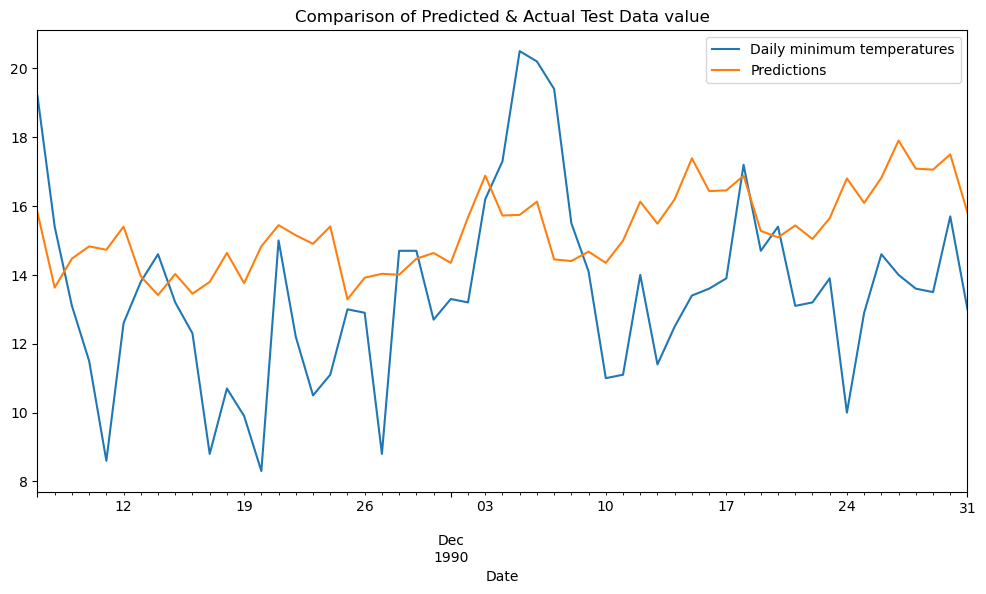

In [36]:
test['Daily minimum temperatures'].plot(figsize = (12,6))
predictions.plot()
plt.title('Comparison of Predicted & Actual Test Data value')
plt.legend()
#plt.savefig('Comparison of Predicted & Actual Test Data value.png')
plt.show()

## Model Evaluation

_**Evaluating the model with the following metrics such as R2 Score, Mean Squared Error, Root Mean Squared Error, Mean Absolute Error and Mean Absolute Percentage Error for the predicted value and test data value**_

In [37]:
print('Evaluation Results for Test Data : \n')
print(' Percenatge of R2 Score : {} %'.format(100*(r2_score(test['Daily minimum temperatures'],predictions))),'\n')
print(' Mean Squared Error : ',mean_squared_error(test['Daily minimum temperatures'],predictions),'\n')
print(' Root Mean Squared Error : ',sqrt(mean_squared_error(test['Daily minimum temperatures'],predictions)),'\n')
print(' Mean Absolute Error : ',mean_absolute_error(test['Daily minimum temperatures'],predictions),'\n')
print(' Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(test['Daily minimum temperatures'],predictions)),'\n')

Evaluation Results for Test Data : 

 Percenatge of R2 Score : -38.68283851939898 % 

 Mean Squared Error :  9.930837377150281 

 Root Mean Squared Error :  3.1513231153200207 

 Mean Absolute Error :  2.647445279701403 

 Mean Absolute Percentage Error : 21.92 % 



## Model Testing

_**Creating the pickle file with the best model that gives high R2 score for the test data**_

In [45]:
pickle.dump(result,open('Best Model.pkl','wb'))

_**Loading the pickle file and predicting the whole data for testing**_

In [46]:
final_model = pickle.load(open('Best Model.pkl','rb'))
fpred = final_model.predict(0, 364, typ = 'levels')

_**Evaluating the model with the following metrics such as R2 Score, Mean Squared Error, Root Mean Squared Error, Mean Absolute Error and Mean Absolute Percentage Error for the predicted value and whole data**_

In [47]:
print(len(df_filter['Daily minimum temperatures']))
print(len(fpred))


365
365


In [48]:
print('Evaluation Results for whole Data : \n')
print(' Percenatge of R2 Score : {} %'.format(100*(r2_score(df_filter['Daily minimum temperatures'],fpred))),'\n')
print(' Mean Squared Error : ',mean_squared_error(df_filter['Daily minimum temperatures'],fpred),'\n')
print(' Root Mean Squared Error : ',sqrt(mean_squared_error(df_filter['Daily minimum temperatures'],fpred)),'\n')
print(' Mean Absolute Error : ',mean_absolute_error(df_filter['Daily minimum temperatures'],fpred),'\n')
print(' Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_filter['Daily minimum temperatures'],fpred)),'\n')

Evaluation Results for whole Data : 

 Percenatge of R2 Score : 51.977526035079656 % 

 Mean Squared Error :  7.141471360377665 

 Root Mean Squared Error :  2.6723531503859412 

 Mean Absolute Error :  2.0465968399344336 

 Mean Absolute Percentage Error : 20.34 % 



## Forecasting

In [67]:
df_filter

,Daily minimum temperatures
Date,
1990-01-01,14.8
1990-01-02,13.3
1990-01-03,15.6
1990-01-04,14.5
1990-01-05,14.3
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [70]:
forecast = final_model.predict(start = '1991-01-01', end = '1991-01-15')

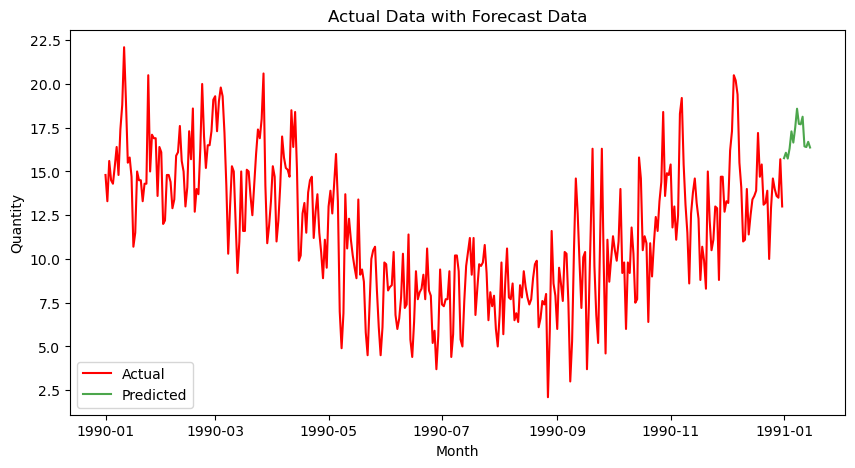

In [71]:
plt.plot(df_filter, color = 'red', label = 'Actual',alpha = 1)
plt.plot(forecast, color = 'green', label = 'Predicted', alpha = 0.7)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend()
plt.title('Actual Data with Forecast Data')
#plt.savefig('Actual Data with Forecast Data.png')
plt.show()

In [64]:
forecast_df=pd.DataFrame(forecast)
forecast_df.rename(columns={'predicted_mean': 'Predicted Future Milk Production'}, inplace=True)
final = pd.concat([df,forecast_df],axis=1)
final['Predicted Future Milk Production'] = final['Predicted Future Milk Production'].round(2)
#final.to_csv('Future Predicted Milk Production.csv')

In [76]:
final

,Date,Daily minimum temperatures,Predicted Future Milk Production
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,NaN
2,1981-01-03,18.8,NaN
3,1981-01-04,14.6,NaN
4,1981-01-05,15.8,NaN
...,...,...,...
1991-03-27 00:00:00,NaT,NaN,20.57
1991-03-28 00:00:00,NaT,NaN,20.24
1991-03-29 00:00:00,NaT,NaN,20.82
1991-03-30 00:00:00,NaT,NaN,21.84
